In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import pathlib
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Input, Conv2D, ReLU, concatenate, Dropout,AvgPool2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator #DataAugmentation
from tensorflow.keras.metrics import Accuracy, Precision, Recall, F1Score, FBetaScore
import os
import shutil
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
#tf.config.run_functions_eagerly(True)

ImportError: DLL load failed while importing _path: The specified module could not be found.

In [2]:
url = 'TB_Chest_Radiography_Database'

In [3]:
data_dir = pathlib.Path(url)

In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

4200


In [5]:
elements = os.listdir(url) #list of all directories
print(elements)

['Normal', 'Normal.metadata.xlsx', 'README.md.txt', 'Tuberculosis', 'Tuberculosis.metadata.xlsx']


In [6]:
img_type= {
    'Normal' : list(data_dir.glob('Normal/*.png')),
    'Tuberculosis' : list(data_dir.glob('Tuberculosis/*.png'))
}

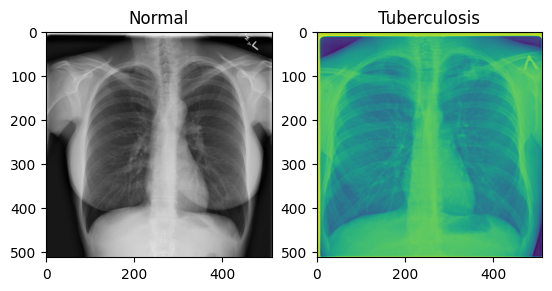

In [8]:
def img_plot_original():
    fig, axs = plt.subplots(1,2)
    i = 0
    for key, value in img_type.items():
        img = mpimg.imread(str(img_type[key][3]))
        axs[i].imshow(img)
        axs[i].set_title(key)
        i+=1
img_plot_original() 

## *Original dataset split*

([<matplotlib.patches.Wedge at 0x268d8a19720>,
 [Text(-0.9526279098330698, 0.5500000594609756, 'Normal'),
  Text(0.9526278840857078, -0.5500001040567061, 'Tuberculosis')],
 [Text(-0.5196152235453108, 0.3000000324332594, '83.3%'),
  Text(0.519615209501295, -0.30000005675820324, '16.7%')])

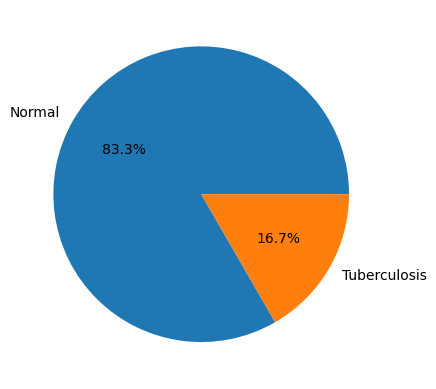

In [9]:
labels = 'Normal', 'Tuberculosis'
sizes = [len(img_type['Normal']), len(img_type['Tuberculosis'])]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [10]:
len(img_type['Normal'])

3500

In [11]:
len(img_type['Tuberculosis'])

700

Reducing Data

Making TESTING DIR

In [12]:
os.mkdir('Xray-Test-Data')

In [13]:
xrayTestUrl = 'Xray-Test-Data'

In [14]:
data_dir_test = pathlib.Path(xrayTestUrl)

TB TESTING DIR

In [15]:
directoryTestTb = "Test-TB-Xray" 
parent_dir = xrayTestUrl
pathTestTB = os.path.join(parent_dir, directoryTestTb) 
os.mkdir(pathTestTB)

Making NORMAL TESTING DIR

In [16]:
directoryTestNM = "Test-NM-Xray"
  
parent_dir = xrayTestUrl

pathTestNM = os.path.join(parent_dir, directoryTestNM) 
os.mkdir(pathTestNM)

In [17]:
normalTestImg = img_type['Normal'][1000:1101]

In [18]:
tbTestImg = img_type['Tuberculosis'][600:]

In [84]:
#Copying samples into Testing TB and NM Dir

In [19]:
destination_directory_tb = 'Xray-Test-Data/Test-TB-Xray'
for img in tbTestImg:
    shutil.copy(img, destination_directory_tb)

In [20]:
destination_directory_NM = 'Xray-Test-Data/Test-NM-Xray'
for img in normalTestImg:
    shutil.copy(img, destination_directory_NM)

----Making Training/VAL DIR¶
TRAINING DIR

In [21]:
os.mkdir('Xray-Data')

In [22]:
xrayUrl = 'Xray-Data'

In [23]:
directoryTB = "TB-Xray"
directoryNM = 'NM-Xray'
  
parent_dir = "Xray-Data"

pathTB = os.path.join(parent_dir, directoryTB) 
os.mkdir(pathTB) 
pathNM = os.path.join(parent_dir, directoryNM) 
os.mkdir(pathNM) 

In [24]:
normal_imgs = img_type['Normal'][:600]
normal_imgs

[WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-10.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-100.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1000.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1001.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1002.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1003.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1004.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1005.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1006.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1007.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1008.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-1009.png'),
 WindowsPath('TB_Chest_Radiography_Database/Normal/Normal-101.png'),
 WindowsPath('TB_Chest_Radi

In [25]:
len(normal_imgs)

600

In [26]:
tb_imgs = img_type['Tuberculosis'][:600]

In [27]:
len(tb_imgs)

600

In [28]:
img_type= {
    'Normal' : list(data_dir.glob('Normal/*.png')),
    'Tuberculosis' : list(data_dir.glob('Tuberculosis/*.png'))
}

In [29]:
destination_directory_tb = 'Xray-Data/TB-Xray'
for img in tb_imgs:
    shutil.copy(img, destination_directory_tb)

In [30]:
destination_directory_nm = 'Xray-Data/NM-Xray'
for img in normal_imgs:
    shutil.copy(img, destination_directory_nm)

In [31]:
data_dir = pathlib.Path("Xray-Data")

In [32]:
img_type= {
    'Normal' : list(data_dir.glob('NM-Xray/*.png')),
    'Tuberculosis' : list(data_dir.glob('TB-Xray/*.png'))
}

In [33]:
len(img_type['Tuberculosis'])

600

In [34]:
len(img_type['Normal'])

600

([<matplotlib.patches.Wedge at 0x268d87c84c0>,
 [Text(6.735557395310444e-17, 1.1, 'Normal'),
  Text(-2.0206672185931328e-16, -1.1, 'Tuberculosis')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

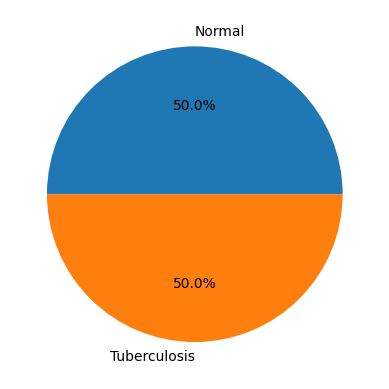

In [35]:
labels = 'Normal', 'Tuberculosis'
sizes = [len(img_type['Normal']), len(img_type['Tuberculosis'])]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [36]:
img_height = 64
img_width = 64
batch_size = 16

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

In [38]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='training',
    seed=123
    )

Found 960 images belonging to 2 classes.


In [39]:
traing_set_len = len(train_generator)
print(traing_set_len)

60


In [40]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

In [41]:
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='validation',
    seed=123
    )

Found 240 images belonging to 2 classes.


In [42]:
val_set_len = len(val_generator)
print(val_set_len)

15


In [43]:
test_generator = val_datagen.flow_from_directory(
    data_dir_test,
    target_size = (img_height, img_width),
    class_mode = 'binary',
    )

Found 201 images belonging to 2 classes.


In [44]:
test_set_len = len(test_generator)
print(test_set_len)

7


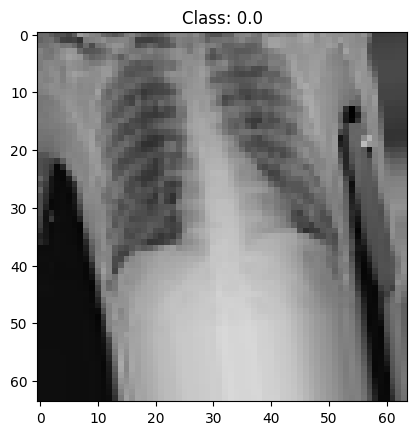

In [45]:
images, labels = next(train_generator)
# Plot one image from the batch
plt.imshow(images[0])
plt.title(f"Class: {labels[0]}")
plt.show()

([<matplotlib.patches.Wedge at 0x268d8cb9300>,
 [Text(0.923301960552699, 0.5979243176519436, 'Validation'),
  Text(-1.048736003975903, -0.3318927446701039, 'Training'),
  Text(1.0606788854346743, -0.29147950527105265, 'Testing')],
 [Text(0.5036192512105631, 0.3261405369010601, '18.3%'),
  Text(-0.5720378203504926, -0.181032406183693, '73.2%'),
  Text(0.578552119328004, -0.1589888210569378, '8.5%')])

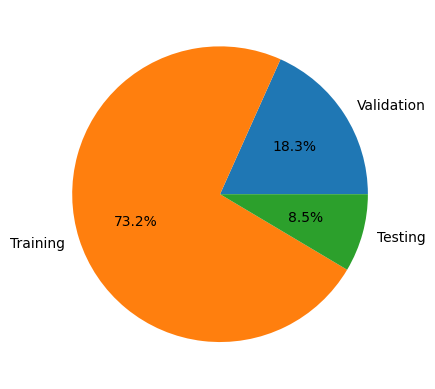

In [46]:
labels = 'Validation', 'Training', 'Testing'
sizes = [val_set_len, traing_set_len, test_set_len]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

SqueezeNet is a deep neural network architecture designed to achieve high accuracy on image recognition tasks with far fewer parameters than typical models, making it more efficient for storage and computation. The key idea behind SqueezeNet is the use of squeeze and expand layers:

Squeeze Layer: This layer uses 1x1 convolution filters to reduce the depth of the feature map. Essentially, it compresses or "squeezes" the input feature map, reducing the number of parameters and computations needed in the subsequent layers.

Expand Layer: After squeezing, this layer uses a mix of 1x1 and 3x3 convolution filters to increase the depth of the feature map again. This "expansion" helps in capturing more complex features from the compressed data.

The alternating squeeze and expand layers allow SqueezeNet to maintain or even exceed the accuracy of larger networks while drastically reducing the number of parameters, making it suitable for devices with limited storage and processing power.

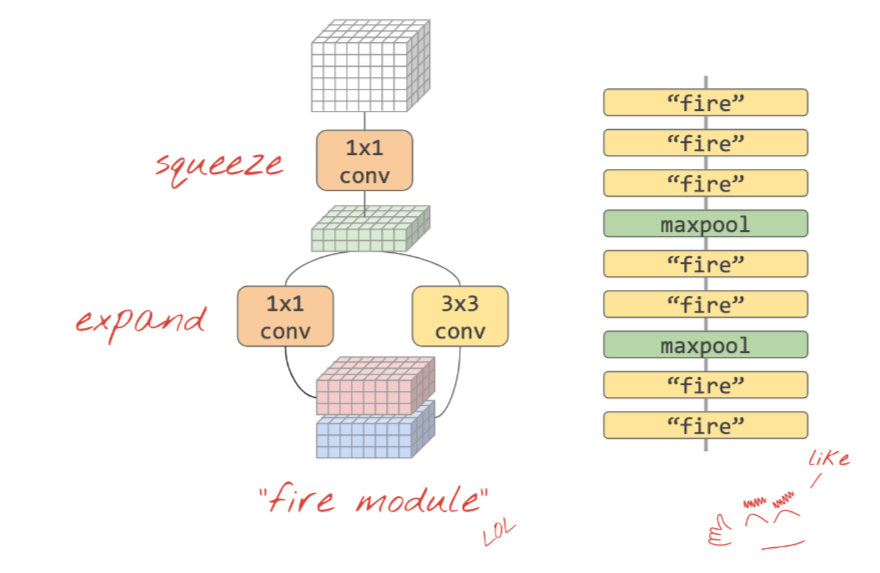

In [47]:
def fireMode(x, s1, e1, e3):
    sx1 = Conv2D(filters=s1, kernel_size=1, activation='relu', padding='same')(x)
    sx1 = BatchNormalization()(sx1)
    ex1 = Conv2D(filters=e1, kernel_size=1, activation='relu', padding='same')(sx1)
    ex1 = BatchNormalization()(ex1)
    ex3 = Conv2D(filters=e3, kernel_size=3, activation='relu', padding='same')(sx1)
    ex3 = BatchNormalization()(ex3)
    return concatenate([ex1, ex3])

In [48]:
def squeezNet(input_size, classes):
    
    x = Input(shape=input_size)
    
    # Entry block
    y = Conv2D(32, kernel_size=3, activation='relu', padding='same')(x)
    y = BatchNormalization()(y)

    # Fire modules
    y = fireMode(y, 12, 24, 24)
    y = BatchNormalization()(y)
    y = GlobalAveragePooling2D()(y)
    y = BatchNormalization()(y)
    # Dense layers
    y = layers.Dense(128, activation='relu')(y)
    y = BatchNormalization()(y)
    y = Dropout(0.5)(y)
    y = BatchNormalization()(y)
    # Output layer 
    y = layers.Dense(1, activation='sigmoid')(y)

    model = Model(inputs=x, outputs=y)
    return model      

In [49]:
model = squeezNet((64,64,3), 1)



Instructions for updating:
Colocations handled automatically by placer.


In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 12)           396       ['batch_normalization[0][0

In [51]:
def f1_score(y_true, y_pred):
    # Calculate true positives, false positives, and false negatives
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    actual_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))

    # Calculate precision and recall
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())

    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1

In [52]:
opt = Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy',Precision(), Recall(),
                                                                  f1_score])

In [53]:
history = model.fit(train_generator, steps_per_epoch=traing_set_len, 
                    epochs=10, validation_data=val_generator, 
                    validation_steps=test_set_len)


Epoch 1/10

60/60 [==============================] - ETA: 0s - batch: 29.5000 - size: 16.0000 - loss: 0.6635 - accuracy: 0.6458 - precision: 0.6598 - recall: 0.6021 - f1_score: 0.6224

C:\Users\codeg\Desktop\KITSAI\saketh\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60/60 [==============================] - 18s 258ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.6635 - accuracy: 0.6458 - precision: 0.6598 - recall: 0.6021 - f1_score: 0.6224 - val_loss: 0.7172 - val_accuracy: 0.4375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/10
60/60 [==============================] - 10s 174ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.5139 - accuracy: 0.7521 - precision: 0.7995 - recall: 0.6729 - f1_score: 0.7245 - val_loss: 0.6980 - val_accuracy: 0.4375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/10
60/60 [==============================] - 11s 185ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.4899 - accuracy: 0.7656 - precision: 0.8102 - recall: 0.6938 - f1_score: 0.7414 - val_loss: 0.6552 - val_accuracy: 0.7679 - val_precision: 0.7403 - val_recall: 0.9048 - val_f1_score: 0.8144
Epoch 4/10
60/60 [==============================] - 11s 188ms/step - batch: 29.5000 - s

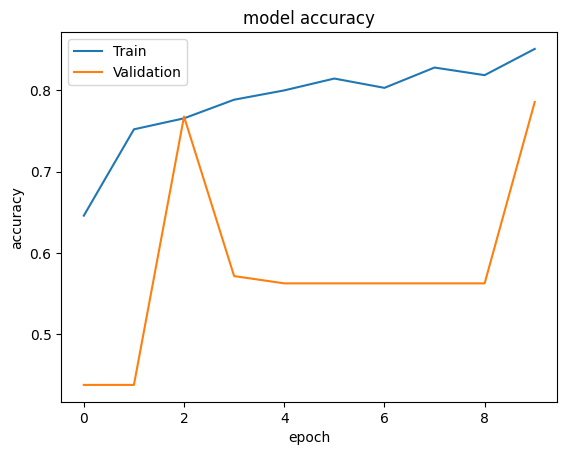

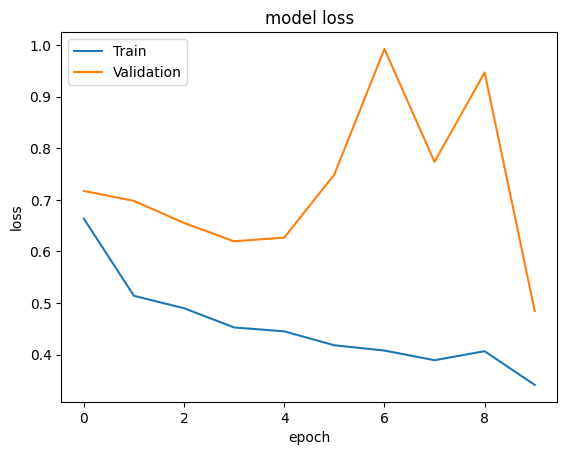

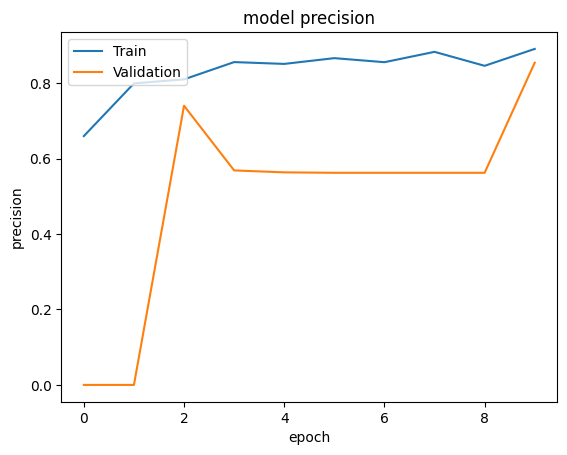

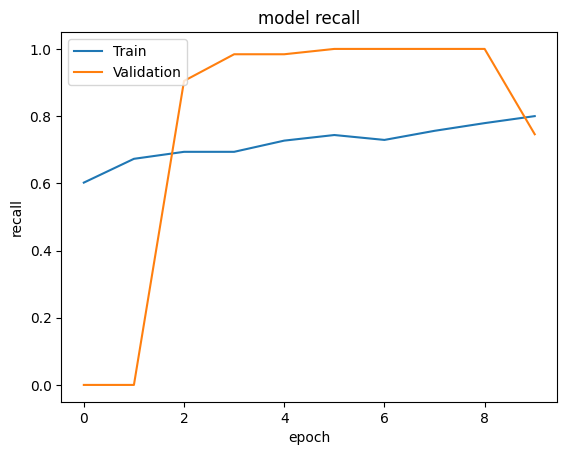

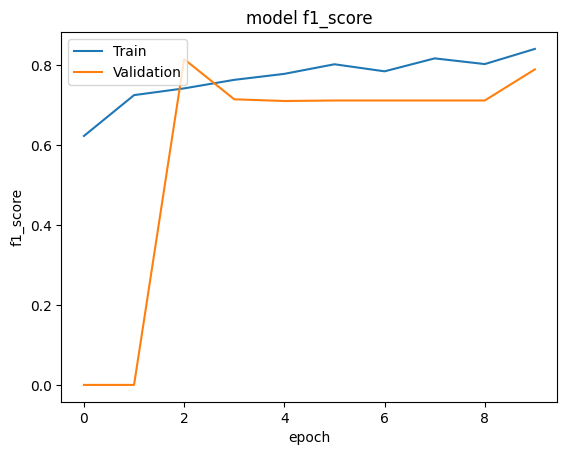

In [54]:
#Results

# summarize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize percison
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize recall
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
#Testing Usage

results = model.evaluate(test_generator)

In [56]:
def results_test_data(results):
    print(f"Loss: {results[0]}")
    print(f"Accuracy: {results[1]}")
    print(f"Percision: {results[2]}")
    print(f"Recall: {results[3]}")
    print(f"F1_Score: {results[4]}")

In [57]:
results_test_data(results)

Loss: 0.4807300993374416
Accuracy: 0.7711442708969116
Percision: 0.79347825050354
Recall: 0.7300000190734863
F1_Score: 0.7717786431312561


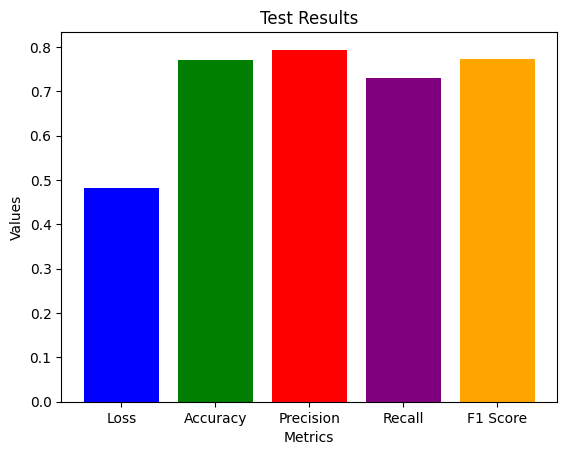

In [58]:
def results_test_data_graph(results):
    labels = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = results[:5]  # Assuming results is a list with at least 5 elements

    # Bar graph
    plt.bar(labels, values, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.title('Test Results')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.show()

# Example usage
results = [results[0], results[1], results[2], results[3], results[4]]
results_test_data_graph(results)

In [59]:
predicted_values = model.predict(test_generator)

C:\Users\codeg\Desktop\KITSAI\saketh\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [60]:
acutal_test_values = []
for i in range(7):
    lst = test_generator[i][1]
    for num in lst:
        acutal_test_values.append(num)

In [61]:
predicted_values = (predicted_values >= 0.5).astype(int)
conf_matrix = confusion_matrix(acutal_test_values, predicted_values)

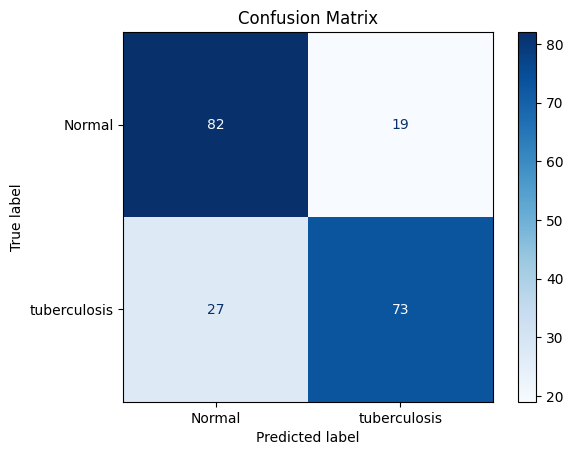

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', "tuberculosis"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [63]:
sum = 0
for i in range(2):
    for j in range(2):
        sum += conf_matrix[i][j]

In [64]:
truth = conf_matrix[0][0] + conf_matrix[1,1]
truth

155

In [65]:
false = conf_matrix[0,1] + conf_matrix[1,0]
false

46

## ResNet

ResNet, short for Residual Network, is a type of convolutional neural network (CNN) that was designed to solve the problem of training very deep networks. As networks grow deeper, they often face the vanishing/exploding gradient problem, which makes them hard to train. ResNet addresses this with the introduction of "skip connections" or "residual connections."

Skip Connections: These are pathways that allow the input to a layer to "skip" one or more layers and be added to the output of a layer deeper in the network.

Residual Blocks: The fundamental building blocks of a ResNet are the residual blocks. Each block consists of several convolutional layers, and the input to the block is added to the output of the block (before applying the final activation function). This addition is the skip connection.

The idea is that these blocks learn the residual mappings (differences) rather than the full desired mapping, which is easier to learn. This design allows for training much deeper networks (ResNets can have hundreds or even thousands of layers) without a significant degradation in performance.

In summary, SqueezeNet is optimized for efficiency with fewer parameters, making it suitable for environments where resources are constrained. ResNet, on the other hand, addresses the challenge of training very deep networks, allowing for significant improvements in model performance by enabling the training of much deeper network architectures efficiently.

In [67]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=(img_height,img_width,3),

                   pooling='avg',classes=1,

                   weights='imagenet')

for each_layer in pretrained_model.layers:

        each_layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(layers.Dense(128, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.3))
resnet_model.add(layers.Dense(64, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.3))
resnet_model.add(BatchNormalization())
resnet_model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_8 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_9 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [69]:
## Training

resnet_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy',Precision(), Recall(),f1_score])

In [78]:
history = resnet_model.fit(train_generator, steps_per_epoch=traing_set_len, epochs=20, validation_data=val_generator)

Epoch 1/20
60/60 [==============================] - 16s 267ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.5675 - accuracy: 0.7146 - precision_1: 0.7289 - recall_1: 0.6833 - f1_score: 0.7026 - val_loss: 0.7028 - val_accuracy: 0.5500 - val_precision_1: 0.6000 - val_recall_1: 0.3000 - val_f1_score: 0.3820
Epoch 2/20
60/60 [==============================] - 15s 245ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.5646 - accuracy: 0.7219 - precision_1: 0.7252 - recall_1: 0.7146 - f1_score: 0.7121 - val_loss: 0.5908 - val_accuracy: 0.6875 - val_precision_1: 0.7419 - val_recall_1: 0.5750 - val_f1_score: 0.6300
Epoch 3/20
60/60 [==============================] - 15s 250ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.5655 - accuracy: 0.6969 - precision_1: 0.7068 - recall_1: 0.6729 - f1_score: 0.6878 - val_loss: 0.6576 - val_accuracy: 0.5667 - val_precision_1: 0.6053 - val_recall_1: 0.3833 - val_f1_score: 0.4319
Epoch 4/20
60/60 [==============================] - 15s 251ms/step - batch: 

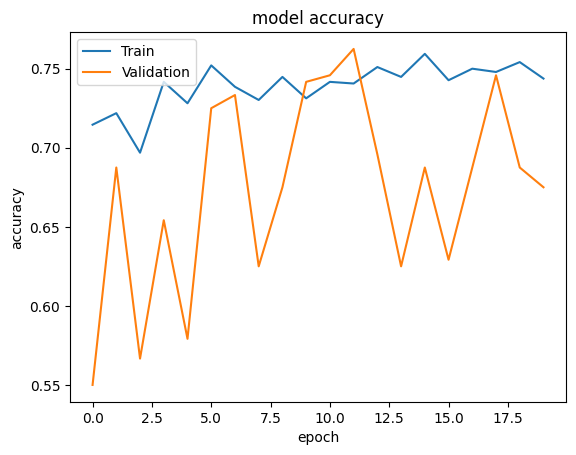

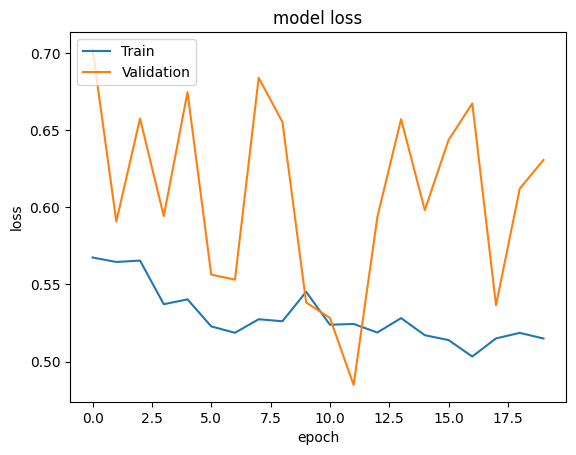

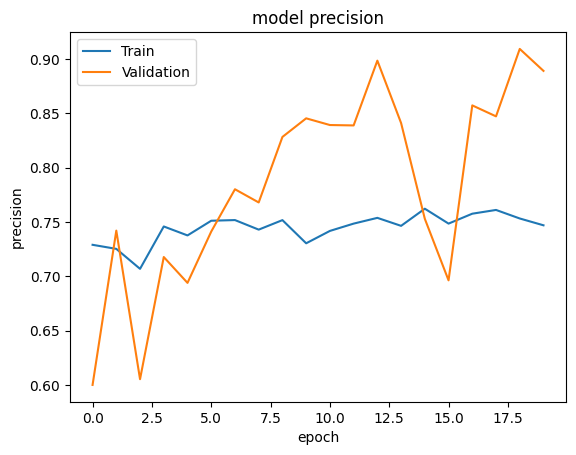

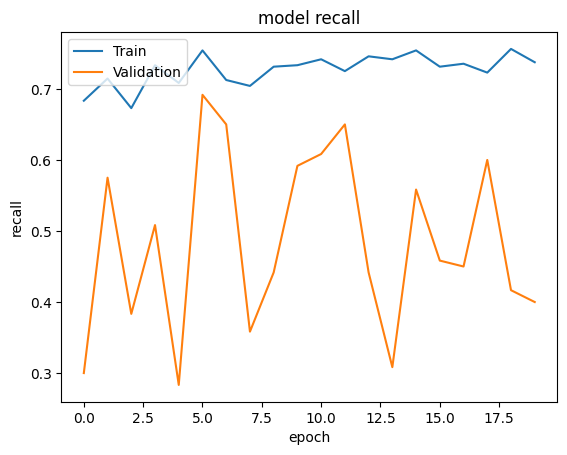

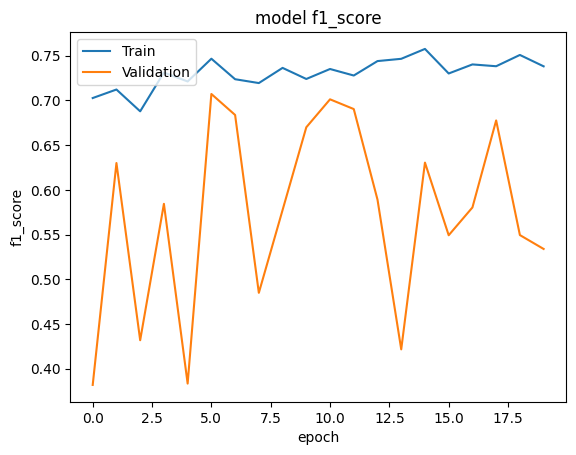

In [79]:
# summarize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize percison
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize recall
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize recall
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [80]:
resnet_results = resnet_model.evaluate(test_generator)

In [81]:
results_test_data(resnet_results)

Loss: 0.5490255866731916
Accuracy: 0.6815920472145081
Percision: 0.875
Recall: 0.41999998688697815
F1_Score: 0.5504902005195618


In [74]:
resnet_predicted_values = resnet_model.predict(test_generator)

C:\Users\codeg\Desktop\KITSAI\saketh\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


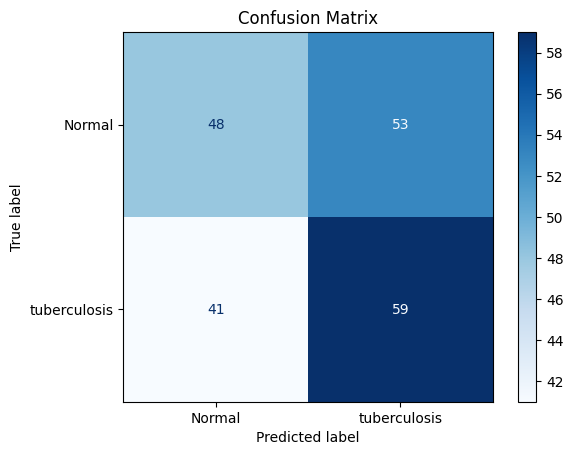

In [75]:
resnet_predicted_values = (resnet_predicted_values >= 0.5).astype(int)
conf_matrix = confusion_matrix(acutal_test_values, resnet_predicted_values)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', "tuberculosis"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

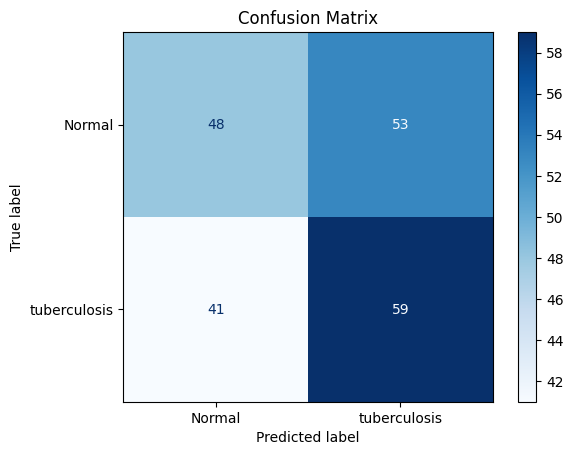

In [76]:
resnet_predicted_values = (resnet_predicted_values >= 0.5).astype(int)
conf_matrix = confusion_matrix(acutal_test_values, resnet_predicted_values)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', "tuberculosis"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [77]:
sum = 0
for i in range(2):
    for j in range(2):
        sum += conf_matrix[i][j]
truth = conf_matrix[0][0] + conf_matrix[1,1]
false = conf_matrix[0,1] + conf_matrix[1,0]

print("Accurate predictions: " + str(truth))
print("Inaccurate predictions: " + str(false))

Accurate predictions: 107
Inaccurate predictions: 94
